## Projeto de Machine Learning II

Autores:

- Diego Dio <br>
- Fernando Brancher <br>
- Marília Vaz Melo <br>
- Mayara Medeiros 


### Lista de básica de itens
A. Análise dos dados do dataset.

B. Preparação do dataset.

B.1. Exclusão dos valore nulos;

B.2. Uso de Feature Scaling - Standard Scaler.
    
B.3. Uso de técnicas de Categórico para Numérico - One Hot Encoder e Ordinal Encoder.
    
B.4. Uso de Column Transformer.

C. Análise exploratória do dataset.

D. Machine Learning.

D.1. PCA, algoritimo não supervisionado;

D.2. Regressão Logística, algorítimo supervisionado;

D.3. SVC, algorítimo supervisionado;

D.4. XGBoost, algorítimo supervisionado.

### Exploração do dataset - Customer Churn Dataset

#### O que é Churn?
É uma métrica bastante utilizada por empresas prestadoras de serviços, pois avalia a porcentagem de clientes que descontinuaram seu relacionamento ou assinatura em um determinado período. É um KPI (Key Performance Indicator) importante para as empresas, pois afeta diretamente a receita, o crescimento e a retenção de clientes.

Acompanhar o churn dá visibilidade de quantos clientes estão sendo perdidos. Seu calculo não responde, especificamente, o que está acontecendo, mas indica um potencial problema que precisa ser resolvido, pois está afetando a satisfação do usuário.

O churn é um dos maiores problemas de negócio em empresas e entender a rotatividade de clientes é crucial para que elas identifiquem padrões, fatores e indicadores que contribuam para a perda desses usuários. 

Ao analisar o comportamento do churn e seus recursos associados, as empresas podem desenvolver estratégias para reter os clientes existentes, melhorar a satisfação do cliente e reduzir a rotatividade de clientes.

As técnicas de modelagem preditiva podem ser aplicadas para prever e lidar proativamente com a rotatividade potencial, permitindo que as empresas tomem medidas para reter clientes em risco.

Fonte: https://www.zendesk.com.br/blog/o-que-e-churn/ <br>
https://mindminers.com/blog/o-que-e-churn/

Neste projeto de Machine Learning II, será usada uma base de dados de Churn de clientes que foi retirado do Kaggle. 

Link do dataset: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
<br>
<br>

In [2]:
# Bibliotecas de manipulação de datasets
import pandas as pd
import numpy as np

#Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning
# Divisão teste/treino, cross-validate
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, learning_curve, GridSearchCV

# Pre-processamento
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA

# Pipeline/Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, make_scorer


## Análise descritiva 

In [3]:
churn_train = pd.read_csv('customer_churn_dataset-training-master.csv')

churn_test = pd.read_csv('customer_churn_dataset-testing-master.csv')

churn_train.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls   
0         2.0  30.0  Female    39.0             14.0            5.0  \
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend   
0           18.0          Standard          Annual        932.0  \
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

#### Analise dos dados do dataset

In [3]:
print(churn_train.shape)
churn_train.info()

(440833, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
print(churn_test.shape)
churn_train.info()

(64374, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


#### Algumas informações sobre o dataset

- 12 colunas sendo destas:
<br>

    - 1 coluna Target ('Churn');
    - 1 coluna de ID;
    - 3 colunas com informações categóricas;
    - 7 colunas com informações numéricas.

<br>

- Tamanho dataset Treino: 440.833 amostras.

- Tamanho dataset Teste: 64.374 amostras.


A coluna Customer ID pode ser removida, uma vez que ela represnta apenas o identificador unico do cliente sem trazer informações que agreguem à análise.

In [4]:
churn_train.drop(columns="CustomerID", inplace=True)
churn_test.drop(columns='CustomerID', inplace=True)

#### Investigando valores nulos nos datasets de treino e teste

Verificando valores nulos no dataset de treino.

In [6]:
# Dataset de Treino
churn_train.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

O Dataset possui 1 valor nulo por coluna. Verificando os valores nulos encontrados:

In [7]:
# Encontrando os valores nulos:
churn_train[churn_train.isnull().any(axis=1)]

Age Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
199295  NaN    NaN     NaN              NaN            NaN            NaN   

       Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
199295               NaN             NaN          NaN               NaN    NaN

Os valores nulos estão concentrados todos em uma única linha, portanto esta será removida.

In [5]:
# No início haviam 440 883 linhas, no final é verificado que uma delas foi removida.
churn_train.dropna(inplace=True)
churn_train.shape[0]

440832

Verificando valores nulos no dataset de teste.

In [9]:
churn_test.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

O dataset de teste não possui valores nulos.

#### Preprocessamento do dataset de treino e teste

- Standard Scaler para as variáveis numéricas (Age, Tenure, Usage Frequency, Support Calls, Payment Delay, Total Spend, Last Interaction)
- One Hot Encoder para a variável de gênero
- Ordinal Encoder para as variáveis categóricas Subscription Type e Contract Length

In [6]:
# Gender Male = 1, Female = 0
subscription = ['Basic', 'Standard', 'Premium']
# Subscription Basic = 0, Standard = 1, Premium = 2

contract = ['Monthly', 'Quarterly', 'Annual']
# contract = Monthly = 0, Quarterly = 1, Annual = 2

# Definindo as colunas a receberem Scaling, OneHotEncoder ou OrdinalEncoder
feat_num = churn_train.drop(columns='Churn').select_dtypes(include=np.number).columns
feat_cat = ['Gender']
feat_cat_ord = ['Subscription Type', 'Contract Length']
new_columns = list(feat_num) + feat_cat + feat_cat_ord + ['Churn']

# Montando transformação das colunas do dataset
preprocess = ColumnTransformer([
    ('std_scaler', StandardScaler(), feat_num),
    ('one_hot', OneHotEncoder(drop='first'), feat_cat),
    ('ord_code', OrdinalEncoder(categories=[subscription, contract]), feat_cat_ord)
], remainder='passthrough')



In [7]:
# Column Transform dataset de treino
churntrain_sclcoded = preprocess.fit_transform(churn_train)

churntrain_sclcoded = pd.DataFrame(churntrain_sclcoded, columns=new_columns)

churntrain_sclcoded.head()

Age    Tenure  Usage Frequency  Support Calls  Payment Delay   
0 -0.753326  0.448760        -0.210511       0.454549       0.609620  \
1  2.059646  1.028278        -1.724562       2.083100      -0.601319   
2  1.255940 -1.000036        -1.375166       0.780259       0.609620   
3  1.497051  0.390808         0.604748       1.105969      -0.722413   
4 -1.315921  0.043097         0.488282       0.454549      -0.601319   

   Total Spend  Last Interaction  Gender  Subscription Type  Contract Length   
0     1.247427          0.293052     0.0                1.0              2.0  \
1    -0.309865         -0.986584     0.0                0.0              0.0   
2    -1.854698         -1.335575     0.0                0.0              1.0   
3    -0.978462          1.689018     1.0                1.0              0.0   
4    -0.060698          0.642043     1.0                0.0              0.0   

   Churn  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0

In [8]:
# Column Transofrm dataset de teste
churntest_sclcoded = preprocess.transform(churn_test)

churntest_sclcoded = pd.DataFrame(churntest_sclcoded, columns=new_columns)

churntest_sclcoded.head()

Age    Tenure  Usage Frequency  Support Calls  Payment Delay   
0 -1.396291 -0.362566        -0.210511       0.128839       1.699466  \
1  0.130751 -0.188711         1.420007       1.105969       0.004151   
2  0.612974 -0.246662        -0.676373      -0.522581       1.941654   
3 -0.351473 -1.289796        -0.443442       0.454549       0.488527   
4  1.095198  1.549845         0.954145       1.757390      -1.327882   

   Total Spend  Last Interaction  Gender  Subscription Type  Contract Length   
0    -0.139601         -0.637592     0.0                0.0              0.0  \
1    -0.197740          0.642043     0.0                1.0              0.0   
2     0.520691          0.758374     1.0                2.0              2.0   
3    -1.659517          0.409382     1.0                2.0              1.0   
4    -0.409531          0.409382     0.0                1.0              2.0   

   Churn  
0    1.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

Como os datasets são muito grandes e aumentariam muito o tempo computacional de teste dos modelos, testaremos diferentes tamanhos amostrais e as variações de média, desvio padrão, mediana e quartis entre o dataset total e as subamostragens.

In [9]:
# Amostra estratificada para 10%, 20% e 30% do dataset de treino
churntrain_strat10 = churntrain_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.10))
churntrain_strat20 = churntrain_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.20))
churntrain_strat30 = churntrain_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.30))

print(churntrain_strat10.shape)
print(churntrain_strat20.shape)
print(churntrain_strat30.shape)

(44083, 11)
(88167, 11)
(132250, 11)


In [14]:
churntrain_sclcoded.describe()

Age        Tenure  Usage Frequency  Support Calls  \
count  4.408320e+05  4.408320e+05     4.408320e+05   4.408320e+05   
mean   7.994637e-17  1.779452e-17    -2.785228e-17   4.332578e-17   
std    1.000001e+00  1.000001e+00     1.000001e+00   1.000001e+00   
min   -1.717774e+00 -1.753410e+00    -1.724562e+00  -1.174002e+00   
25%   -8.336969e-01 -8.841327e-01    -7.928383e-01  -8.482914e-01   
50%   -2.999058e-02  4.309671e-02     2.242036e-02  -1.968711e-01   
75%    6.933451e-01  8.544225e-01     8.376790e-01   7.802593e-01   
max    2.059646e+00  1.665748e+00     1.652938e+00   2.083100e+00   

       Payment Delay   Total Spend  Last Interaction         Gender  \
count   4.408320e+05  4.408320e+05      4.408320e+05  440832.000000   
mean   -3.094698e-18 -8.304107e-16      1.191459e-16       0.567681   
std     1.000001e+00  1.000001e+00      1.000001e+00       0.495399   
min    -1.570070e+00 -2.207684e+00     -1.568236e+00       0.000000   
25%    -8.435065e-01 -6.296283e-01     -8.702531e-01       0.000000   
50%    -1.169430e-01  1.220243e-01     -5.593961e-02       1.000000   
75%     7.307144e-01  8.238436e-01      8.747044e-01       1.000000   
max     2.062747e+00  1.529816e+00      1.805348e+00       1.000000   

       Subscription Type  Contract Length          Churn  
count      440832.000000    440832.000000  440832.000000  
mean            1.012821         1.204373       0.567107  
std             0.813357         0.746851       0.495477  
min             0.000000         0.000000       0.000000  
25%             0.000000         1.000000       0.000000  
50%             1.000000         1.000000       1.000000  
75%             2.000000         2.000000       1.000000  
max             2.000000         2.000000       1.000000

In [15]:
churntrain_strat10.describe()


Age        Tenure  Usage Frequency  Support Calls  \
count  44083.000000  44083.000000     44083.000000   44083.000000   
mean       0.002564     -0.002383        -0.003167      -0.001569   
std        0.997303      1.000395         1.001795       1.000874   
min       -1.717774     -1.753410        -1.724562      -1.174002   
25%       -0.833697     -0.884133        -0.909304      -0.848291   
50%       -0.029991      0.043097         0.022420      -0.196871   
75%        0.693345      0.854422         0.837679       0.780259   
max        2.059646      1.665748         1.652938       2.083100   

       Payment Delay   Total Spend  Last Interaction        Gender  \
count   44083.000000  44083.000000      44083.000000  44083.000000   
mean       -0.004856      0.006414         -0.000818      0.564345   
std         0.996160      0.999334          1.006065      0.495848   
min        -1.570070     -2.207684         -1.568236      0.000000   
25%        -0.843507     -0.604712         -0.870253      0.000000   
50%        -0.116943      0.130579         -0.055940      1.000000   
75%         0.730714      0.829865          0.874704      1.000000   
max         2.062747      1.529816          1.805348      1.000000   

       Subscription Type  Contract Length         Churn  
count       44083.000000     44083.000000  44083.000000  
mean            1.010798         1.199578      0.567112  
std             0.814896         0.746118      0.495481  
min             0.000000         0.000000      0.000000  
25%             0.000000         1.000000      0.000000  
50%             1.000000         1.000000      1.000000  
75%             2.000000         2.000000      1.000000  
max             2.000000         2.000000      1.000000

In [16]:
churntrain_strat20.describe()

Age        Tenure  Usage Frequency  Support Calls  \
count  88167.000000  88167.000000     88167.000000   88167.000000   
mean      -0.000113     -0.000816         0.005293       0.001613   
std        1.000527      0.998388         0.997866       1.000594   
min       -1.717774     -1.753410        -1.724562      -1.174002   
25%       -0.833697     -0.884133        -0.792838      -0.848291   
50%       -0.029991      0.043097         0.022420      -0.196871   
75%        0.693345      0.854422         0.837679       0.780259   
max        2.059646      1.665748         1.652938       2.083100   

       Payment Delay   Total Spend  Last Interaction        Gender  \
count   88167.000000  88167.000000      88167.000000  88167.000000   
mean       -0.001670      0.003550         -0.006007      0.567355   
std         1.002774      0.998511          0.999996      0.495445   
min        -1.570070     -2.207684         -1.568236      0.000000   
25%        -0.843507     -0.621323         -0.870253      0.000000   
50%        -0.116943      0.125263         -0.055940      1.000000   
75%         0.730714      0.828329          0.874704      1.000000   
max         2.062747      1.529816          1.805348      1.000000   

       Subscription Type  Contract Length         Churn  
count       88167.000000     88167.000000  88167.000000  
mean            1.010956         1.199224      0.567106  
std             0.814383         0.747351      0.495479  
min             0.000000         0.000000      0.000000  
25%             0.000000         1.000000      0.000000  
50%             1.000000         1.000000      1.000000  
75%             2.000000         2.000000      1.000000  
max             2.000000         2.000000      1.000000

In [10]:
# Amostra estratificada para 10%, 20% e 30% do dataset de teste
churntest_strat10 = churntest_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.10))
churntest_strat20 = churntest_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.20))
churntest_strat30 = churntest_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.30))

print(churntest_strat10.shape)
print(churntest_strat20.shape)
print(churntest_strat30.shape)

(6437, 11)
(12875, 11)
(19312, 11)


In [18]:
churntest_sclcoded.describe()

Age        Tenure  Usage Frequency  Support Calls  \
count  64374.000000  64374.000000     64374.000000   64374.000000   
mean       0.208789      0.042797        -0.084701       0.585058   
std        1.119154      0.990874         1.026815       1.014263   
min       -1.717774     -1.753410        -1.724562      -1.174002   
25%       -0.753326     -0.768229        -1.025769      -0.196871   
50%        0.211121      0.101049        -0.094045       0.780259   
75%        1.175569      0.912374         0.837679       1.431680   
max        2.059646      1.665748         1.652938       2.083100   

       Payment Delay   Total Spend  Last Interaction        Gender  \
count   64374.000000  64374.000000      64374.000000  64374.000000   
mean        0.504747     -0.376212          0.118422      0.466353   
std         1.071949      1.083355          1.004914      0.498870   
min        -1.570070     -2.207684         -1.568236      0.000000   
25%        -0.359131     -1.323142         -0.753923      0.000000   
50%         0.730714     -0.405378          0.060391      0.000000   
75%         1.457278      0.566371          0.991035      1.000000   
max         2.062747      1.529816          1.805348      1.000000   

       Subscription Type  Contract Length         Churn  
count       64374.000000     64374.000000  64374.000000  
mean            0.999534         0.988815      0.473685  
std             0.816084         0.822341      0.499311  
min             0.000000         0.000000      0.000000  
25%             0.000000         0.000000      0.000000  
50%             1.000000         1.000000      0.000000  
75%             2.000000         2.000000      1.000000  
max             2.000000         2.000000      1.000000

In [19]:
churntest_strat10.describe()

Age       Tenure  Usage Frequency  Support Calls  \
count  6437.000000  6437.000000      6437.000000    6437.000000   
mean      0.234757     0.042818        -0.097012       0.558380   
std       1.113083     0.990116         1.028251       1.008639   
min      -1.717774    -1.753410        -1.724562      -1.174002   
25%      -0.753326    -0.768229        -1.025769      -0.196871   
50%       0.291492     0.101049        -0.094045       0.780259   
75%       1.255940     0.912374         0.837679       1.431680   
max       2.059646     1.665748         1.652938       2.083100   

       Payment Delay  Total Spend  Last Interaction       Gender  \
count    6437.000000  6437.000000       6437.000000  6437.000000   
mean        0.510292    -0.390027          0.089595     0.465590   
std         1.068030     1.066355          1.011183     0.498853   
min        -1.570070    -2.207684         -1.568236     0.000000   
25%        -0.359131    -1.306531         -0.753923     0.000000   
50%         0.730714    -0.417837          0.060391     0.000000   
75%         1.457278     0.516538          0.991035     1.000000   
max         2.062747     1.529816          1.805348     1.000000   

       Subscription Type  Contract Length        Churn  
count         6437.00000      6437.000000  6437.000000  
mean             0.99332         0.985552     0.473668  
std              0.81954         0.821523     0.499345  
min              0.00000         0.000000     0.000000  
25%              0.00000         0.000000     0.000000  
50%              1.00000         1.000000     0.000000  
75%              2.00000         2.000000     1.000000  
max              2.00000         2.000000     1.000000

In [20]:
churntest_strat20.describe()

Age        Tenure  Usage Frequency  Support Calls  \
count  12875.000000  12875.000000     12875.000000   12875.000000   
mean       0.209436      0.048980        -0.093756       0.592094   
std        1.124210      1.000390         1.028316       1.013822   
min       -1.717774     -1.753410        -1.724562      -1.174002   
25%       -0.753326     -0.768229        -1.025769      -0.196871   
50%        0.211121      0.101049        -0.094045       0.780259   
75%        1.175569      0.912374         0.837679       1.431680   
max        2.059646      1.665748         1.652938       2.083100   

       Payment Delay   Total Spend  Last Interaction        Gender  \
count   12875.000000  12875.000000      12875.000000  12875.000000   
mean        0.496361     -0.385180          0.120124      0.465476   
std         1.077978      1.080161          1.004038      0.498826   
min        -1.570070     -2.207684         -1.568236      0.000000   
25%        -0.359131     -1.327295         -0.753923      0.000000   
50%         0.609620     -0.426142          0.176721      0.000000   
75%         1.457278      0.549760          0.991035      1.000000   
max         2.062747      1.529816          1.805348      1.000000   

       Subscription Type  Contract Length         Churn  
count       12875.000000     12875.000000  12875.000000  
mean            0.998136         0.986330      0.473709  
std             0.814081         0.822323      0.499328  
min             0.000000         0.000000      0.000000  
25%             0.000000         0.000000      0.000000  
50%             1.000000         1.000000      0.000000  
75%             2.000000         2.000000      1.000000  
max             2.000000         2.000000      1.000000

Como os valores de distribuição das features permaneceram bastante semelhantes, usaremos uma subamostragem de 20% para treino e teste para:
- Análise Exploratória;
- Cross Validation;
- Tuning de Hiperparâmetros;
- Learning Curve.

## Análise Exploratória

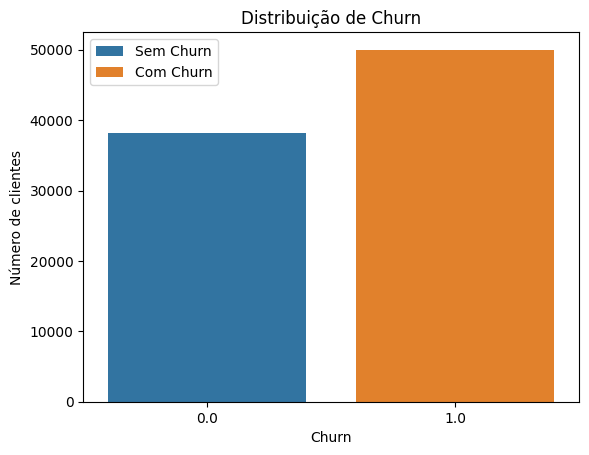

In [21]:
ax = sns.countplot(data=churntrain_strat20, x='Churn', hue='Churn', dodge=False)
ax.set_title('Distribuição de Churn')
ax.set_ylabel('Número de clientes')
ax.set_xlabel('Churn')
ax.legend(labels=['Sem Churn', 'Com Churn'])
plt.show()

In [22]:
churntrain_strat20['Churn'].value_counts(normalize=True)

Churn
1.0    0.567106
0.0    0.432894
Name: proportion, dtype: float64

Há um baixo desbalanceamento entre clientes com churn e sem churn.

#### Avaliando os clientes com churn e sem churn:

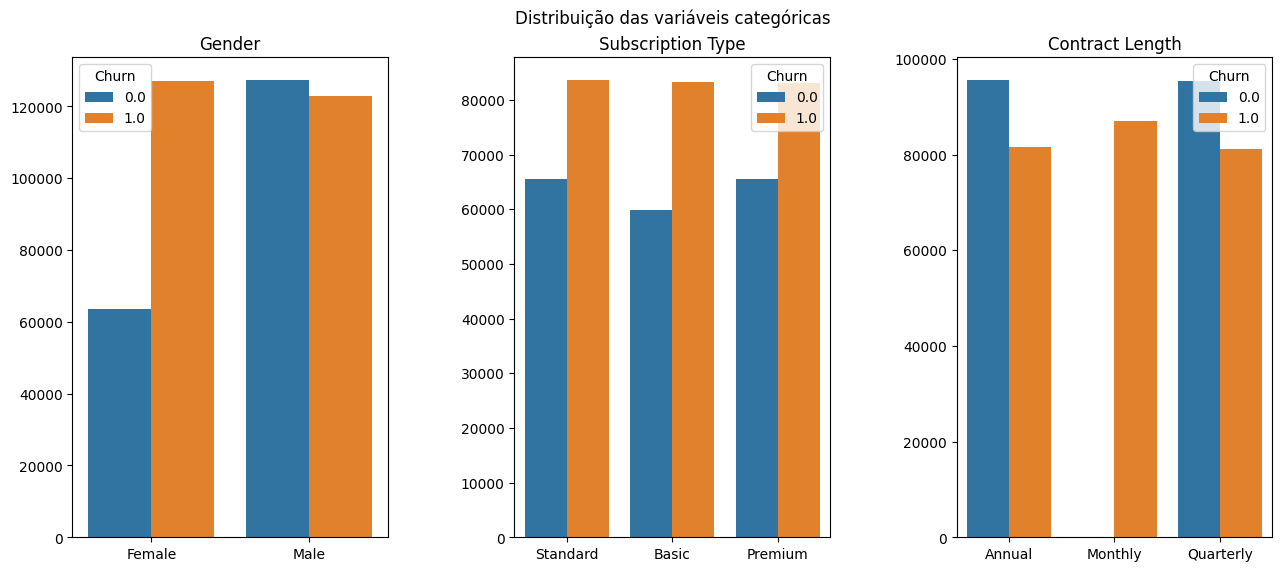

In [23]:
category_list = ['Gender', 'Subscription Type', 'Contract Length']
count = 1

plt.subplots(1,3, figsize=(15,6))

for category in category_list:
    plt.subplot(1,3,count)
    sns.countplot(data=churn_train, x=category, hue='Churn')
    plt.ylabel('')
    plt.xlabel('')
    plt.title(category)
    count += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    
plt.suptitle('Distribuição das variáveis categóricas')
plt.show()

- Há uma diferença expressiva entre clientes com churn e sem churn para o sexo feminino;
- Não há clientes sem churn que apresentem tempo de contrato mensal. Já no dataset de teste há um valor para o tempo de contrato mensal e clientes sem churn;
- Não há diferença expressiva de clientes com ou sem churn entre os tipos de contrato (Standard, Basic e Premium) no gráfico de Subscription Type. 

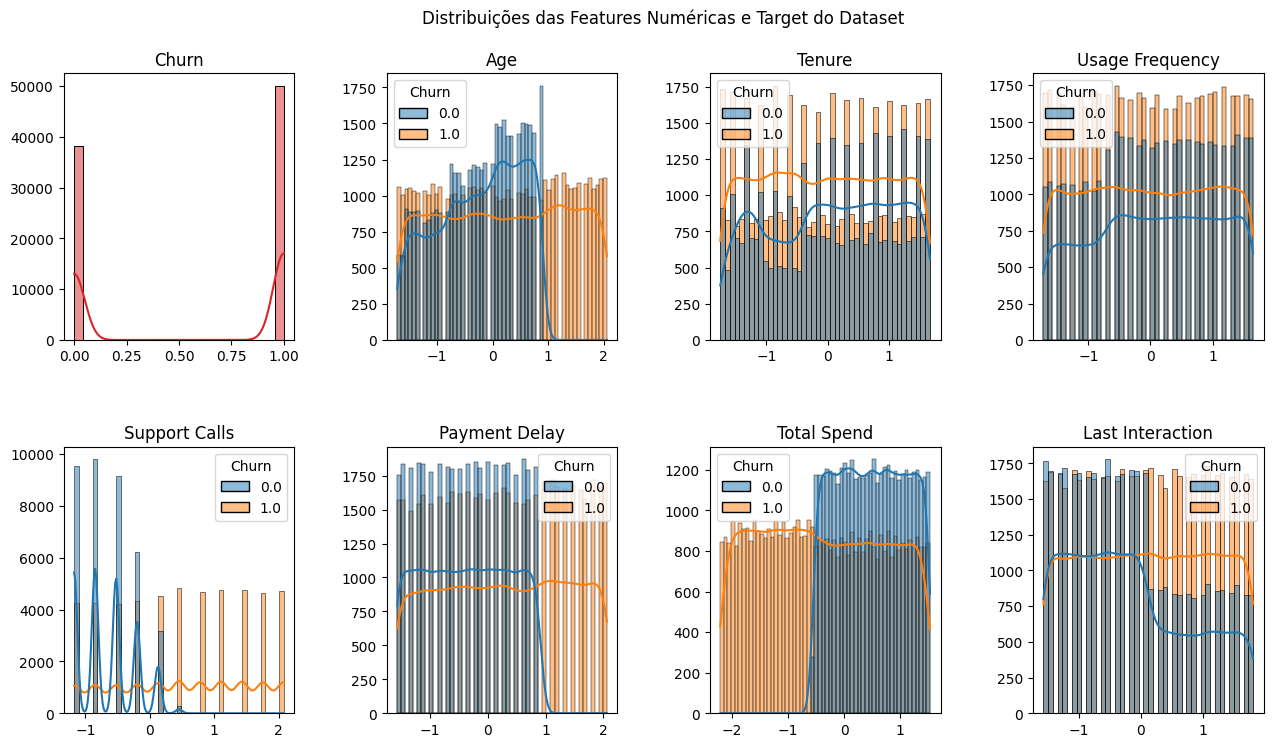

In [24]:
# Distribuição das variáveis numéricas
feature_names = ['Churn', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

fig = plt.figure(figsize=(15,8))

for number, category in enumerate(feature_names, start=1):
    if category == 'Churn':
        ax = fig.add_subplot(2,4,number)
        sns.histplot(data=churntrain_strat20, x=category, kde=True, color='tab:red')
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')
    else:
        ax = fig.add_subplot(2, 4,number)
        sns.histplot(data=churntrain_strat20, x=category, hue='Churn', kde=True)
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')      

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Distribuições das Features Numéricas e Target do Dataset')
plt.show()

- Nenhuma distribuição segue a curva normal; 
- Várias distribuições se aproximam de uma distribuição uniforme;
- As distribuições de algumas variáveis tem tendências contrárias quando separadas entre 'com churn' e 'sem churn'.

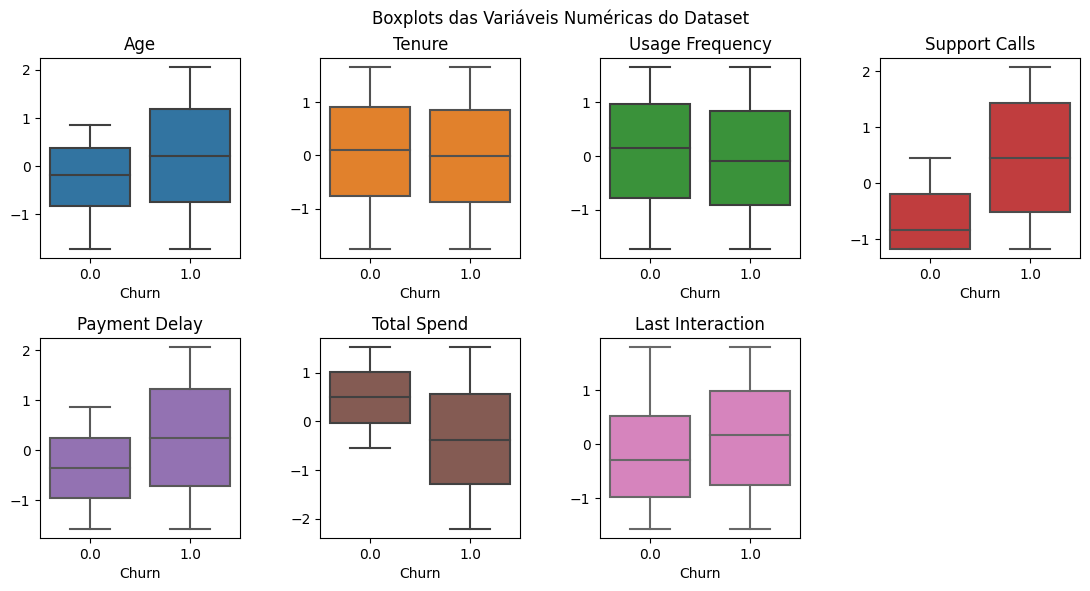

In [ ]:
# Boxplot das features
numeric_list = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
colors = {1:'tab:blue', 2:'tab:orange', 3:'tab:green', 4:'tab:red', 5:'tab:purple', 6:'tab:brown', 7: 'tab:pink'}

fig= plt.figure(figsize=(13,6))

for number, category in enumerate(numeric_list, start=1):
    ax = fig.add_subplot(2,4,number)
    sns.boxplot(data=churntrain_strat20, y=category, x='Churn', color=colors[number])
    plt.title(category)
    plt.xlabel('Churn')
    ax.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Boxplots das Variáveis Numéricas do Dataset')
plt.show()

- Distribuições de ```Age, Support Calls, Payment Delay e Total Spend``` possuem diferenças entre 'com churn' e 'sem churn';
- ```Suport Calls e Payment Delay``` sem churn apresentam mediana e quartis mais baixos, ou seja, necessitaram menos do suporte e atrasaram menos seus pagamentos. 
- ```Total Spend``` apresenta o oposto, na variável sem churn a mediana e quartis são maiores, ou seja, estes clientes gastam um valor maior.
- As colunas ```Age e Last Interaction``` aparentam ter maior amplitude no intervalo interquartil em 'com churn' que o observado para 'sem churn';
- Este dataset não apresenta **outliers em nenhuma feature**.

### Pairplot e mapa de correlação

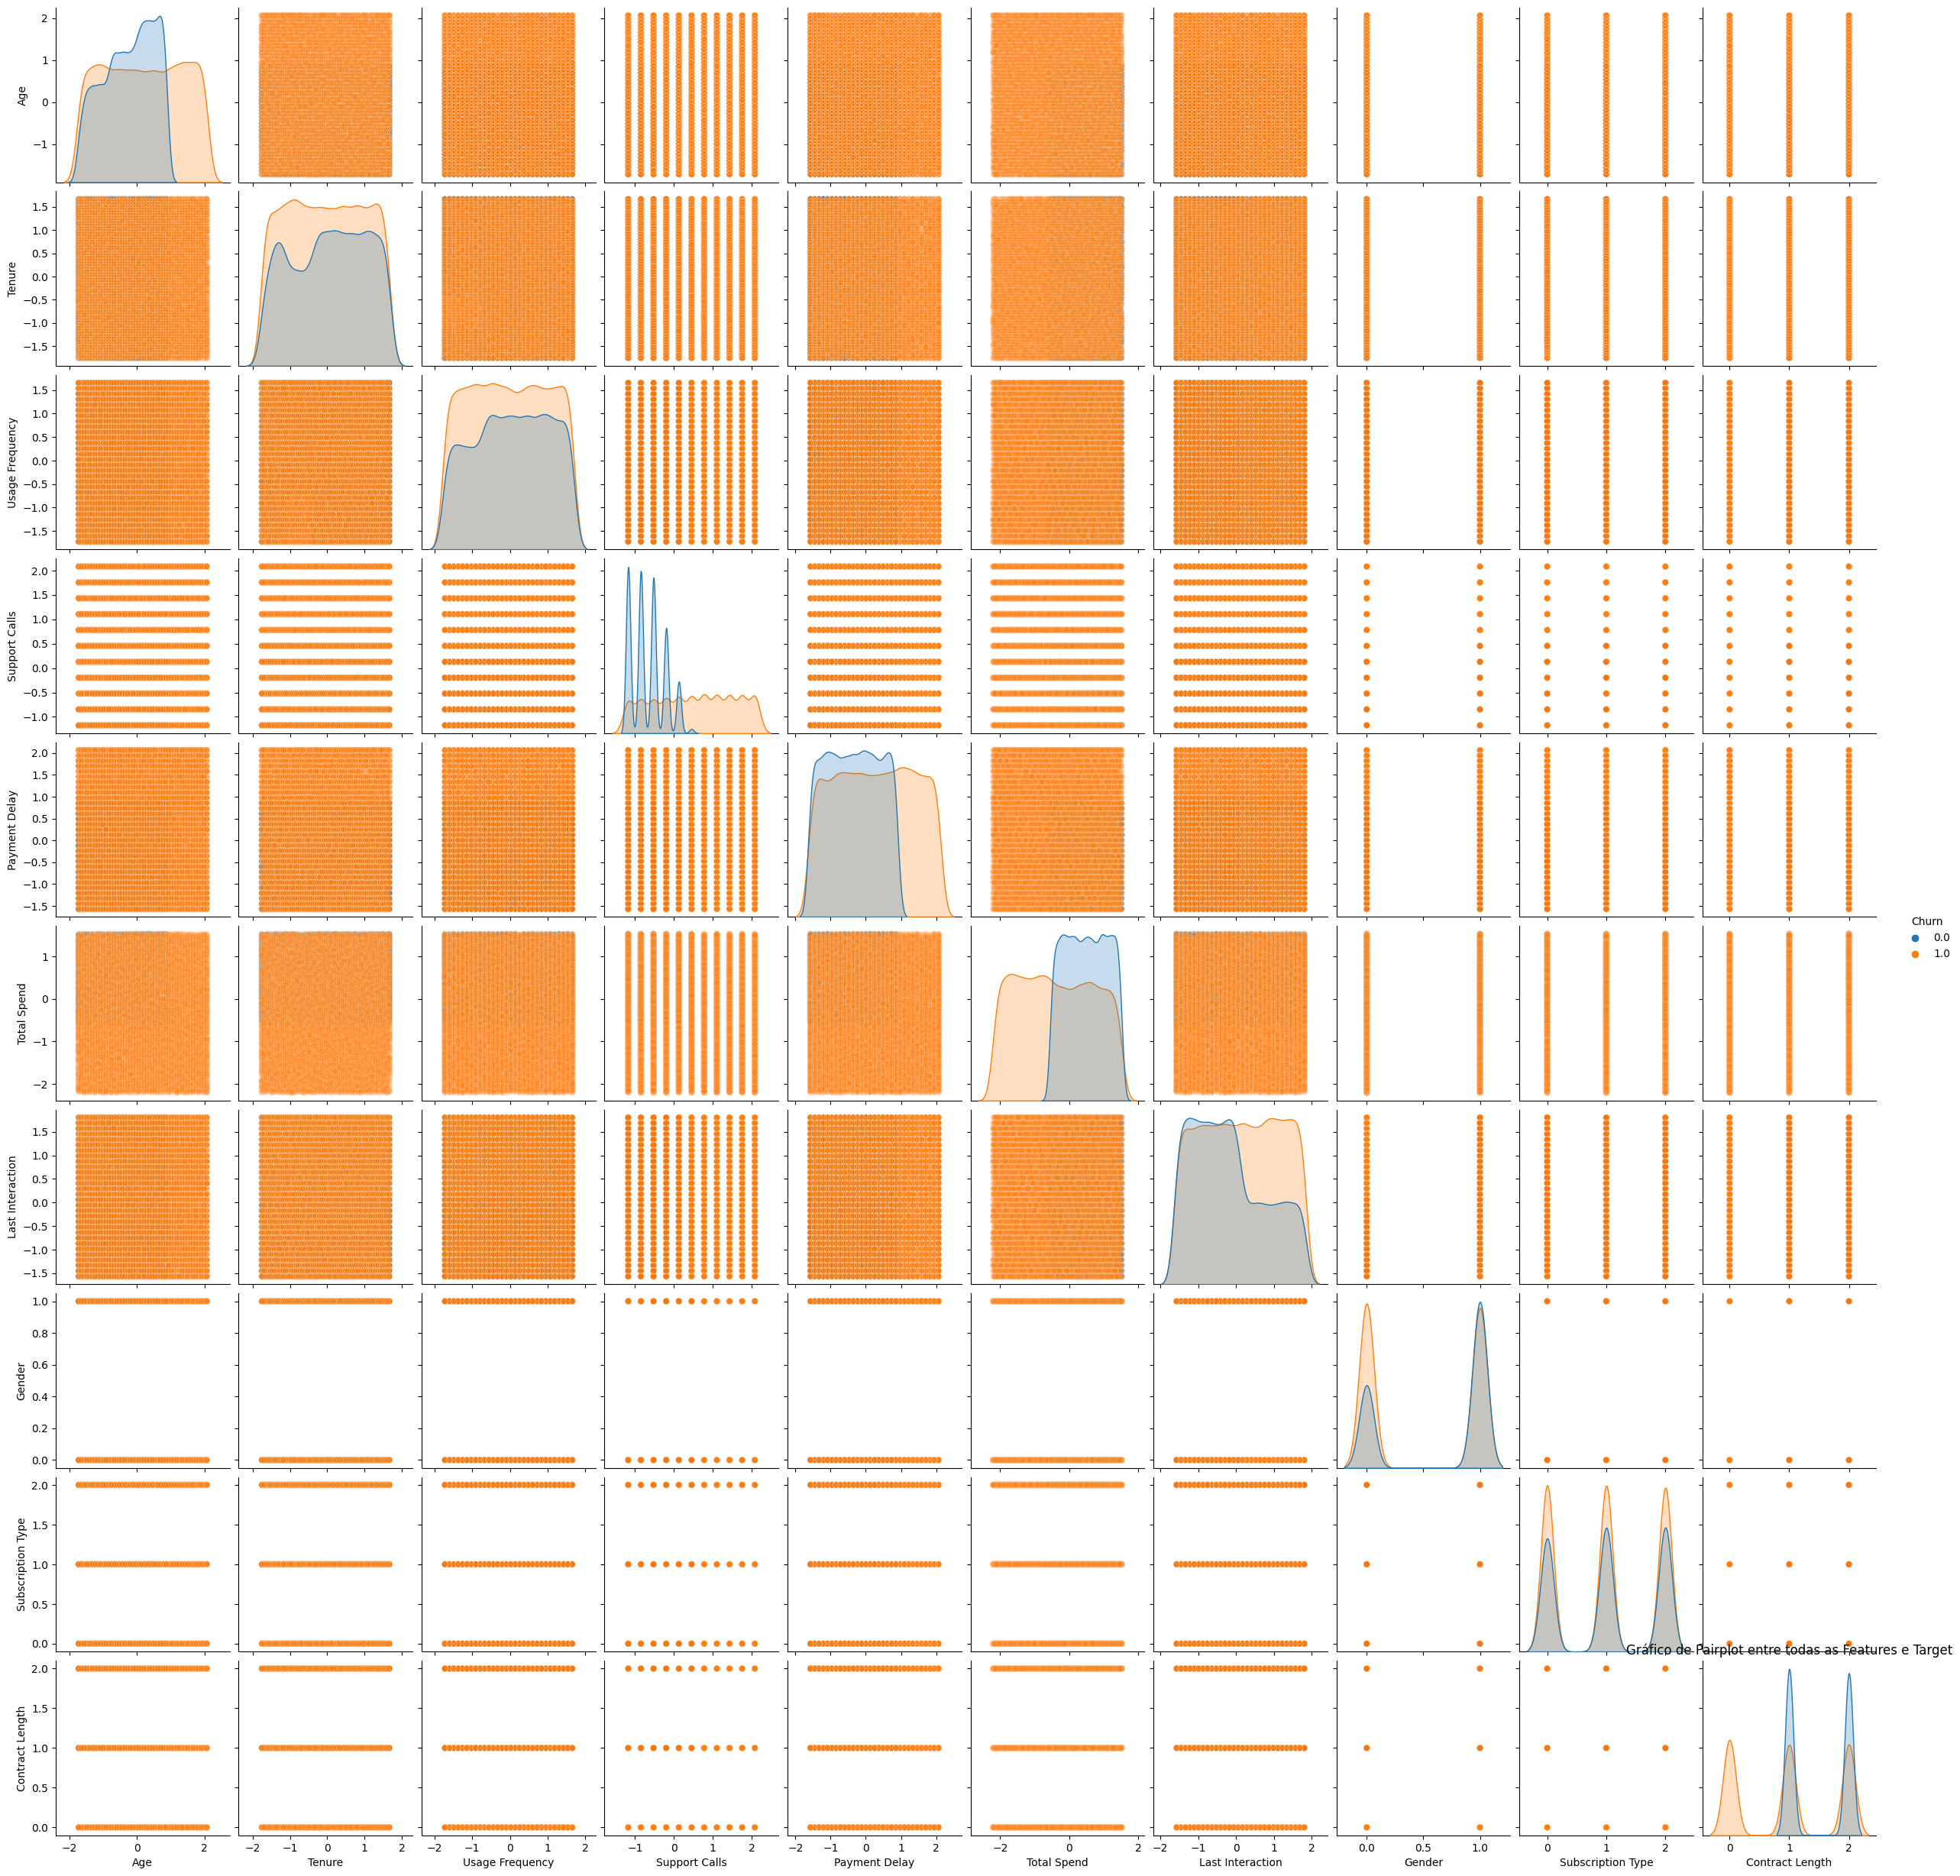

In [11]:
# Repensar o plot do pairplot.
# Como tem mais observações 'Churn' = 1.0, devido a sobreposição, os dados 'Churn' = 0.0 não aparecem, acredito que estão embaixo.
sns.pairplot(data=churntrain_strat10, kind='scatter', hue='Churn', plot_kws=dict(alpha=0.1))
plt.title('Gráfico de Pairplot entre todas as Features e Target')
plt.show()

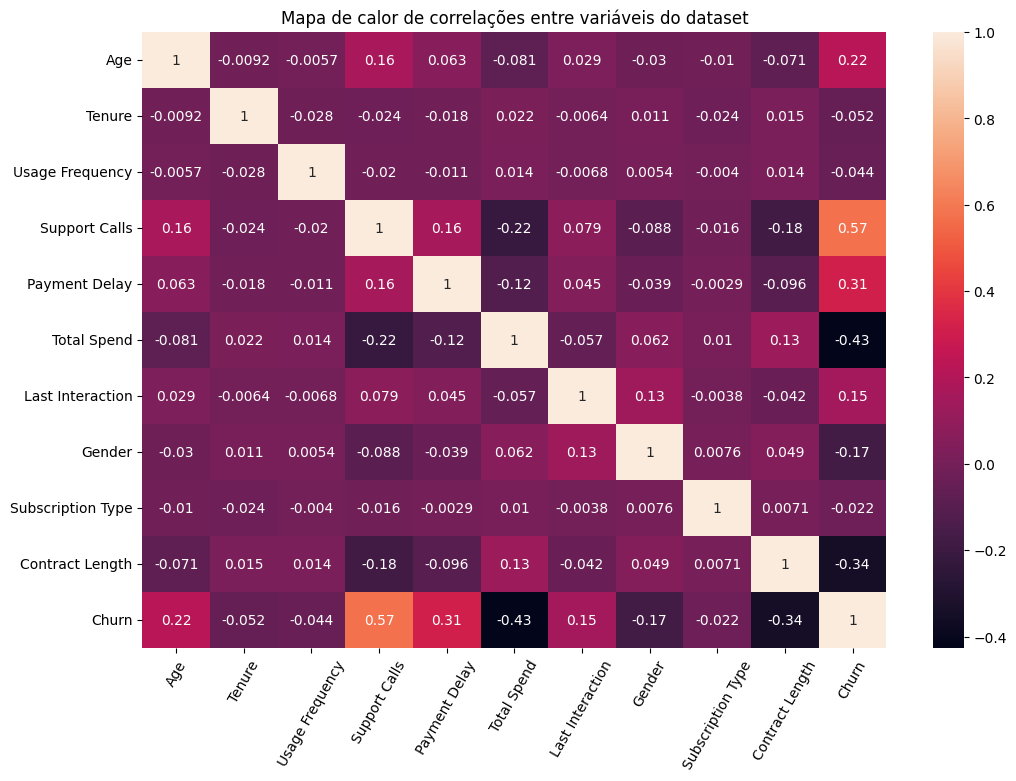

In [ ]:
# Correlação e heatmap das features e target
plt.figure(figsize=(12,8))
sns.heatmap(churntrain_strat20.corr(), annot=True)
plt.title('Mapa de calor de correlações entre variáveis do dataset')
plt.xticks(rotation=60)
plt.show()

- As features que mais se destacam em correlação com o target são: ```Support Calls, Payment Delay, Total Spend, Contract Length```, seguidas por ```Age, Last Interaction, Gender```.
- Além destas, ```Support Calls, Payment Delay, Total Spend```, duas a duas, apresentam certas correlações entre si (variando de -0.22 a 0.16).

- Padrões interessantes, em algumas features parece que o SVM se daria muito bem. Em algumas aparece tipo um L, que me lembra muito o AdaBoost/XGBoost. Observando as curvas kde, deve ter bastante sobreposição também.

## PCA - Redução da dimensionalidade

É uma técnica de Machine Learning não supervisionada que é utilizada para a redução de dimensionalidade. 

Seu objetivo é transformar um conjunto de dados de alta dimensão em um novo conjunto de variáveis não correlacionadas: os componentes principais. Esses são ordenados por seu peso na variância total dos dados.

A redução de dimensionalidade realizada pelo PCA tem o benefício de simplificar a representação dos dados, mantendo a maior parte de sua variabilidade. Quando se trabalha com conjuntos de dados de alta dimensão, isso torna mais fácil a visualização e a análise dos padrões presentes nos dados. Ele também é útil para remoção de ruído e redundâncias, melhorando o desempenho de algoritmos de Machine Learning em tarefas subsequentes.



- Teste de PCA com 2 componentes:

In [12]:
Xsample_train = churntrain_strat20.drop(columns='Churn')
ysample_train = churntrain_strat20['Churn']

Xsample_test = churntest_strat20.drop(columns='Churn')
ysample_test = churntest_strat20['Churn']

In [13]:
# Apesar de juntos, PC1 e PC2, representarem apenas 30% da variância dos dados, tentei rodar abaixo a distribuição.
pca_2 = PCA(n_components=2,random_state=42)
pca_2.fit(Xsample_train)

PCA(n_components=2, random_state=42)

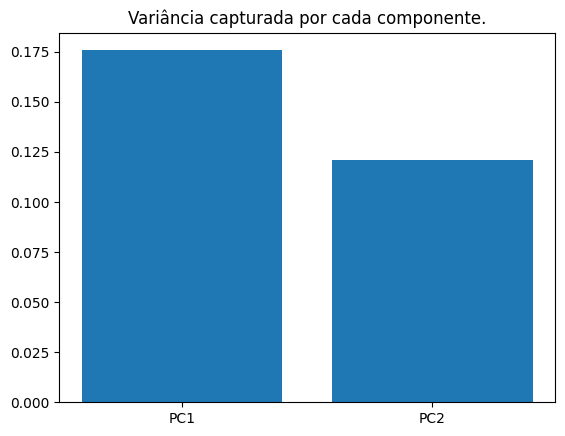

In [23]:
labels = [f'PC{i+1}' for i in range(pca_2.n_components_)]
plt.bar(labels, pca_2.explained_variance_ratio_)
plt.title("Variância capturada por cada componente.")
plt.show()

In [14]:
# Transforma as features do dataset de treino nas features do PCA
X_train_pca_2 = pca_2.transform(Xsample_train)

In [15]:
# Cria um dataset temporário, cópia do original, mas sem os índices, 
# caso contrário não é possível pegar a coluna de "Chrun" para o novo dataset abaixo.
churntrain_strat20_temp = churntrain_strat20.reset_index(drop=True)

# Cria um dataframe, onde agora as features são os dois PCs do modelo "pca_2"
X_train_pca_2 = pd.DataFrame(X_train_pca_2, columns=['PC1','PC2'])

# Adiciona neste novo dataframe, os dados de "Churn"
X_train_pca_2['Churn'] = churntrain_strat20_temp['Churn']
X_train_pca_2.head()

PC1       PC2  Churn
0 -0.989187 -1.957578    0.0
1 -1.577486 -0.308090    0.0
2 -0.931649  0.388547    0.0
3 -1.609040  0.848171    0.0
4 -1.829608 -1.323074    0.0

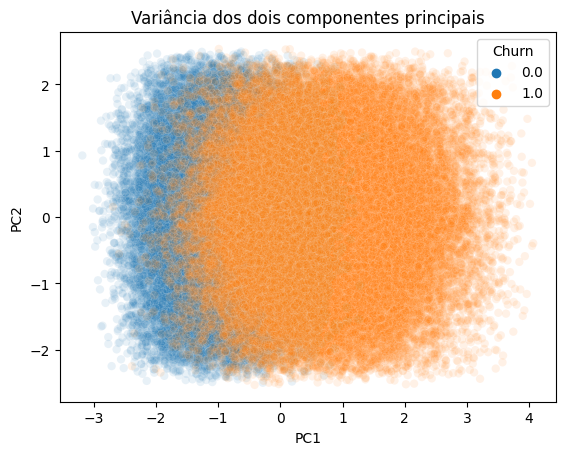

In [18]:
sns.scatterplot(data=X_train_pca_2,
                x="PC1", y="PC2",
                hue="Churn",
                alpha=0.1, linewidth=0.5)
plt.title('Variância dos dois componentes principais')
plt.show()

Mesmo com os componentes PC1 e PC2 representando 30% da variância dos dados, ao utilizar apenas estes componentes é possível notar um padrão/segregação.

#### PCA Completo

In [19]:
#Criando o modelo de PCA e fazendo fit com nossos dados de treino
pca = PCA(random_state=42)
pca.fit(Xsample_train)

PCA(random_state=42)

In [20]:
# Variância capturada por cada componente
pca.explained_variance_ratio_

array([0.17557425, 0.12181889, 0.11638765, 0.11413735, 0.111705  ,
       0.10387134, 0.09005059, 0.07787853, 0.06089047, 0.02768593])

- O primeiro componente explica cerca 17.5% da variância nos dados.
- Cada um dos componentes 2 a 6, explica, em média 11%, a variância dos dados.
- Os componentes 7 a 9, explicam aprox.: 9%, 8% e 6%, respectivamente.
- O décimo componente explica apenas 2.8% da variância dos dados.

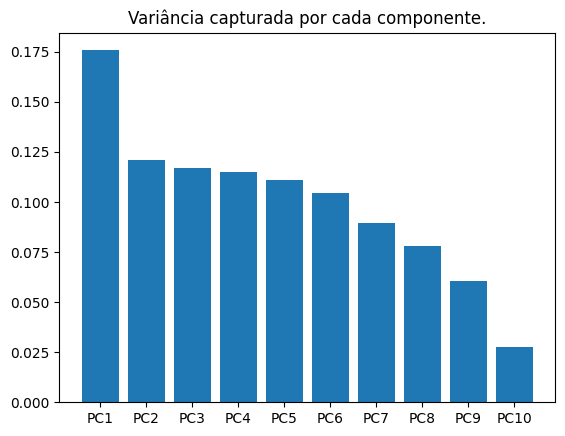

In [29]:
labels = [f'PC{i+1}' for i in range(pca.n_components_)]
plt.bar(labels, pca.explained_variance_ratio_)
plt.title("Variância capturada por cada componente.")
plt.show()

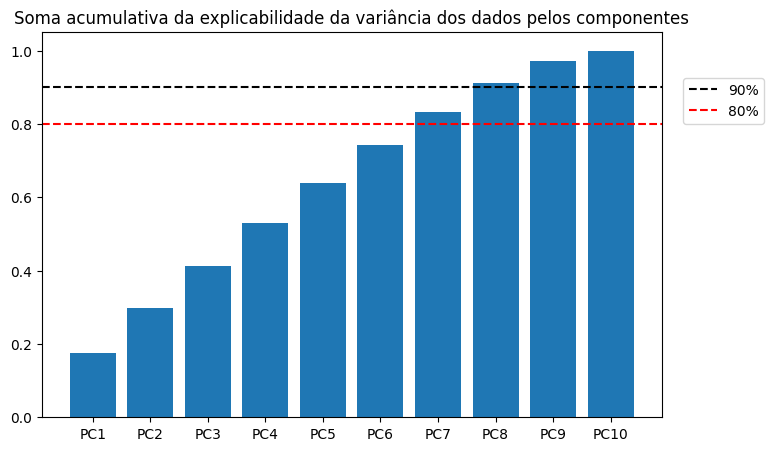

In [30]:
# Utilizando o modelo com os 10 componentes do PCA
plt.figure(figsize=(8,5))
labels = [f'PC{i+1}' for i in range(pca.n_components_)]
plt.bar(labels, pca.explained_variance_ratio_.cumsum())
plt.axhline(y=0.9, color='k', linestyle= '--', label="90%")
plt.axhline(y=0.8, color='r', linestyle= '--', label="80%")
plt.legend(bbox_to_anchor = (1.1, 0.9), loc = 'upper center')
plt.title("Soma acumulativa da explicabilidade da variância dos dados pelos componentes")
plt.show()

In [31]:
print("Soma acumulativa da explicabilidade dos componentes: \n")
for soma in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f"Até o {soma[0]+1}º = {round(soma[1]*100,1)} %")

Soma acumulativa da explicabilidade dos componentes: 

Até o 1º = 17.6 %
Até o 2º = 29.7 %
Até o 3º = 41.4 %
Até o 4º = 52.9 %
Até o 5º = 63.9 %
Até o 6º = 74.4 %
Até o 7º = 83.3 %
Até o 8º = 91.2 %
Até o 9º = 97.2 %
Até o 10º = 100.0 %


Como no PCA as features viram nossos componentes (que são a combinação das features originais), acabamos perdendo um pouco da explicabilidade do modelo, além de que a variancia dos dados não é altamente representada por poucos componentes. 

Já que neste dataset não temos tantas features, acredito que não seja tão essencial usar o PCA, a não ser pelo critério de apresentar algo que envolvia aprendizagem não-supervisionada.

#### DATASET APÓS PCA

Neste caso, analisando os gráficos acima, poderíamos decicidir em usar apenas os 7 ou 8 primeiros componentes. 

In [22]:
# Cria e fita o PCA
pca_final = PCA(n_components = 8, random_state=42)
pca_final.fit(Xsample_train)

# Transforma as features do dataset de treino nas features do PCA
X_train_pca = pca_final.transform(Xsample_train)

# Cria um dataframe, onde agora as features são o componentes do pca_final
labels_pca_final = [f"PC{i+1}" for i in range(pca_final.n_components_)]
X_train_pca = pd.DataFrame(X_train_pca, columns=labels_pca_final)

# Adiciona neste novo dataframe, os dados de "Churn"
churn_pca = X_train_pca.copy()
churn_pca['Churn'] = churntrain_strat20['Churn'].reset_index(drop=True)
churn_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7   
0 -0.989187 -1.957578  1.130041  0.159170  0.653093  0.106629  0.277167  \
1 -1.577486 -0.308090 -0.088434 -0.686528  0.066918  1.026398 -0.200003   
2 -0.931649  0.388547 -0.547399 -1.549314 -0.090192 -0.239759 -1.048652   
3 -1.609040  0.848171 -1.294639  0.863734  0.756658 -0.184937 -0.071610   
4 -1.829608 -1.323074 -0.436670  1.513679 -1.212575 -1.118720  0.051252   

        PC8  Churn  
0  1.001332    0.0  
1  0.967762    0.0  
2 -0.053434    0.0  
3 -0.903105    0.0  
4  1.040980    0.0

In [23]:
#Aplica o PCA nos dados de teste e cria o dataset
df_test_pca = pca_final.transform(churntest_strat20.drop(columns='Churn'))
df_test_pca = pd.DataFrame(df_test_pca, columns=labels_pca_final)
df_test_pca['Churn'] = churntest_strat20['Churn'].reset_index(drop=True)
df_test_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7   
0  0.993308 -0.226563 -0.793342 -1.403742  0.131377 -1.281953 -0.821148  \
1  1.569302  1.057253  1.222245 -0.668712  1.199736 -0.329930  1.375582   
2  1.511154  1.679054 -0.950671  0.545459  0.736744  0.648630  1.087737   
3  1.102057  0.303526 -1.274212  0.039487 -1.030324  1.260385 -0.805008   
4  1.080968 -1.195876  1.408304 -0.508265 -0.366706 -1.097235 -0.686670   

        PC8  Churn  
0 -0.057815    0.0  
1  0.980465    0.0  
2  1.032067    0.0  
3  1.005067    0.0  
4 -1.035283    0.0

In [24]:
# Separa os dados para treino e teste, após o PCA
X_train_pca = churn_pca.drop(columns='Churn')
y_train_pca = churn_pca['Churn']

X_test_pca = df_test_pca.drop(columns='Churn')
y_test_pca = df_test_pca['Churn']

## Machine Learning

- Divisão de X e y treino e teste:

In [25]:
#Randomized Search CV
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metric1 = make_scorer(accuracy_score)
metric2 = make_scorer(f1_score)

#### Regressão Logística
 
É um algoritmo de Machine Learning supervisionado usado para problemas de classificação binária, ou seja, aqueles em que as saídas esperadas pertencem a apenas duas classes distintas, geralmente representadas como 0 e 1.

Embora o nome contenha a palavra "regressão", é importante notar que é usada para classificação e não para problemas de regressão.

Este algorítimo é amplamente utilizado em várias áreas, como medicina, finanças e marketing. É relativamente simples, mas eficaz e interpretável, o que o torna uma escolha popular em diversas aplicações.



##### Tuning de Hiperparâmetros
- Com PCA aplicado nos datasets

In [28]:
# Logistic Regression
model_log = LogisticRegression()

param_rs_log = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3,3,10),
    'solver': ['liblinear', 'saga']
}

gridsearch_log = GridSearchCV(
    estimator=model_log,
    param_grid=param_rs_log,
    scoring={'accuracy': metric1, 'f1': metric2},
    cv=splitter,
    refit='accuracy',
    n_jobs=-1,
    verbose=1
)

gridsearch_log.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score)},
             verbose=1)

In [29]:
gridsearch_log.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [30]:
ylog_pred_test = gridsearch_log.predict(X_test_pca)
ylog_pred_train = gridsearch_log.predict(X_train_pca)

In [33]:
print('Dados de Treino com PCA:')
print(classification_report(y_train_pca, ylog_pred_train))
print('\nDados de Teste com PCA:')
print(classification_report(y_test_pca, ylog_pred_test, zero_division=0.0))

Dados de Treino com PCA:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85     38167
         1.0       0.90      0.85      0.88     50000

    accuracy                           0.86     88167
   macro avg       0.86      0.87      0.86     88167
weighted avg       0.87      0.86      0.86     88167


Dados de Teste com PCA:
              precision    recall  f1-score   support

         0.0       0.94      0.24      0.38      6776
         1.0       0.54      0.98      0.69      6099

    accuracy                           0.59     12875
   macro avg       0.74      0.61      0.54     12875
weighted avg       0.75      0.59      0.53     12875



- O modelo com PCA apresentou uma baixa melhora no desempenho dos dados de teste.
Acurária foi de 0.58 a 0.59

#### SVC

É um algoritmo de Machine Learning supervisionado usado principalmente para problemas de classificação binária. Ele é particularmente útil em cenários onde os dados são linearmente separáveis.

No entanto, em casos onde os dados não são linearmente separáveis, podem ser usados kernels para transformar o espaço de características, permitindo a separação das classes em espaços de dimensões superiores. Essa capacidade de usar kernels é uma das principais vantagens do SVC, tornando-o capaz de lidar com problemas mais complexos e não lineares. Porém, isso pode ser computacionalmente mais custoso em comparação com outros algoritmos.

Quando bem ajustado, o SVC pode produzir resultados muito precisos e é amplamente utilizado em várias aplicações, incluindo reconhecimento de padrões, processamento de imagens, bioinformática e muitos outros domínios.

##### Tuning de Hiperparâmetros
- Com PCA aplicado nos datasets

In [34]:
# SVC
model_svc = SVC()

param_rs_svc = {
    'C': np.logspace(-3, 3, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

randomsearch_svc = RandomizedSearchCV(
    estimator=model_svc,
    param_distributions=param_rs_svc,
    n_iter=50,
    scoring={'accuracy': metric1, 'f1': metric2},
    cv=splitter,
    refit='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

randomsearch_svc.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
randomsearch_svc.best_params_

In [ ]:
ysvc_pred_test = randomsearch_svc.predict(X_test_pca)
ysvc_pred_train = randomsearch_svc.predict(X_train_pca)

In [ ]:
print('Dados de Treino com PCA:')
print(classification_report(y_train_pca, ysvc_pred_train))
print('\nDados de Teste com PCA:')
print(classification_report(y_test_pca, ysvc_pred_test))

#### XGBoost

É um poderoso algoritmo de Machine Learning baseado em árvores de decisão, projetado para resolver problemas de regressão e classificação. Ele combina várias árvores de decisão para melhorar a precisão preditiva e evitar overfitting.

O XGBoost é altamente popular em competições de ciência de dados e é amplamente utilizado em problemas do mundo real devido à sua capacidade de fornecer resultados precisos e robustos. Ele é eficiente e escalável, o que o torna a escolha preferida em muitos cenários onde a precisão é uma prioridade. No entanto, devido à sua complexidade, é importante ajustar cuidadosamente os hiperparâmetros do algoritmo para obter o melhor desempenho em cada tarefa específica.


##### Tuning de Hiperparâmetros
- Com PCA aplicado nos datasets

In [ ]:
# XGBoost
model_xgb = XGBClassifier()

param_rs_xgb = {
    'learning_rate': np.linspace(0, 1, 20),
    'max_depth': range(1,6),
    'n_estimators': [100, 200, 300, 400, 500]    
}

randomsearch_xgb = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_rs_xgb,
    n_iter=50,
    scoring={'accuracy': metric1, 'f1': metric2},
    cv=splitter,
    refit='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

randomsearch_xgb.fit(X_train_pca, y_train_pca)

In [ ]:
randomsearch_xgb.best_params_

{'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.10526315789473684}

In [ ]:
yxgb_pred_test = randomsearch_xgb.predict(X_test_pca)
yxgb_pred_train = randomsearch_xgb.predict(X_train_pca)

In [ ]:
print('Dados de Treino com PCA:')
print(classification_report(y_train_pca, yxgb_pred_train))
print('\nDados de Teste com PCA:')
print(classification_report(y_test_pca, yxgb_pred_test))

Dados de Treino com PCA:

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     38167
         1.0       1.00      0.95      0.97     50000

     accuracy                          0.97     88167
     macro avg     0.97      0.97      0.97     88167
     weighted avg  0.97      0.97      0.97     88167


Dados de Teste com PCA:

              precision    recall  f1-score   support

         0.0       0.98      0.14      0.25      6776
         1.0       0.51      1.00      0.68      6099

     accuracy                          0.55     12875
     macro avg     0.74      0.57      0.46     12875
     weighted avg  0.76      0.55      0.45     12875

#### Learning Curve dos Modelos

- Com PCA aplicado no Dataset

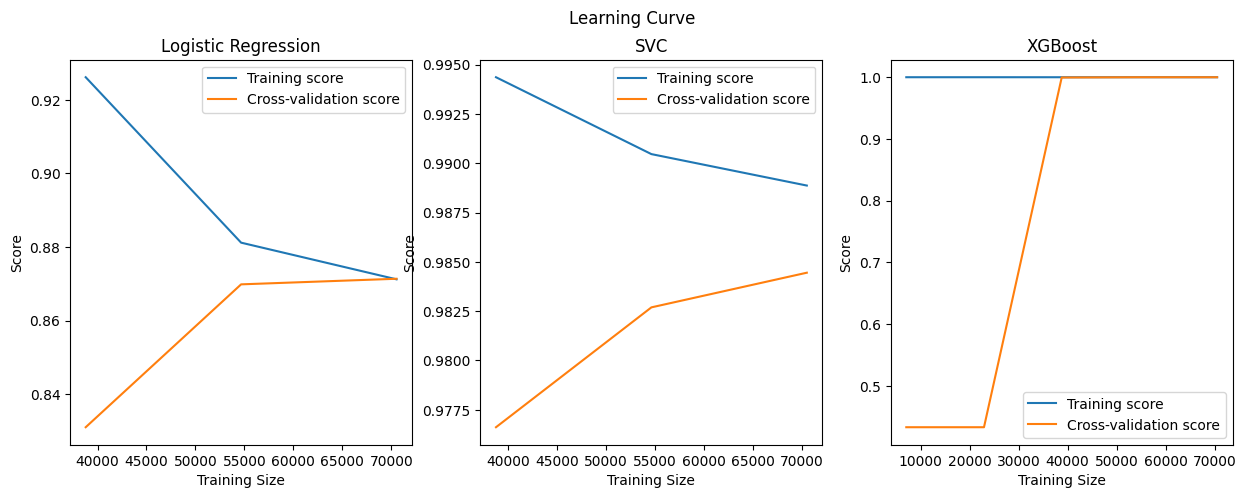

In [23]:
# Learning Curve Linear Regression
models = {'Logistic Regression': LogisticRegression(C=0.001, penalty='l2', solver='liblinear'), #ok
          'SVC': SVC(kernel='rbf', gamma='auto', C=46.4), # sem tratamento da pca
          'XGBoost': XGBClassifier(n_estimators=400, max_depth=5, learning_rate=0.1)} # ok

number = 1

fig = plt.figure(figsize=(15,5))

for name, model in models.items():   
    train_sizes, train_scores, val_scores = learning_curve(model, X_train_pca, y_train_pca, cv=splitter, n_jobs=-1)

    # Compute the mean of the scores
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Plot the learning curve
    ax = fig.add_subplot(1,3,number)
    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, val_scores_mean, label='Cross-validation score')
    plt.title(name)
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    
    number += 1

plt.suptitle('Learning Curve')
plt.show()

### Versão Final: 100% dos dados de treino e teste

In [20]:
X_train = churntrain_sclcoded.drop(columns='Churn')
y_train = churntrain_sclcoded['Churn']

X_test = churntest_sclcoded.drop(columns='Churn')
y_test = churntest_sclcoded['Churn']

In [ ]:
# Fita o PCA para os dados totais
pca_final.fit(X_train)

# Transforma as features do dataset de treino nas features do PCA
Xt_train_pca = pca_final.transform(X_train)

# Cria um dataframe, onde agora as features são o componentes do pca_final
Xt_train_pca = pd.DataFrame(Xt_train_pca, columns=labels_pca_final)

#Aplica o PCA nos dados de teste e cria o dataset
Xt_test_pca = pca_final.transform(X_test)
Xt_test_pca = pd.DataFrame(Xt_test_pca, columns=labels_pca_final)

#### Modelo com melhores métricas

- Utilizando PCA

In [49]:
# Escolher modelo com melhores métricas dentre os 3 testados
model = LogisticRegression(C=0.001, penalty='l2', solver='liblinear') #Escolher melhor modelo seguindo as métricas e Learning Curve

In [50]:
model.fit(Xt_train_pca,y_train)
y_pred_test = model.predict(Xt_test_pca)
y_pred_train = model.predict(Xt_train_pca)

In [48]:
print(f".......... Dados de Treino: Regressão Logística:........")
print(classification_report(y_train, y_pred_train))
print(f"\n.......... Dados de Teste: Regressão Logística:........")
print(classification_report(y_test, y_pred_test))

.......... Dados de Treino: Regressão Logística:........
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85    190833
         1.0       0.90      0.87      0.88    249999

    accuracy                           0.87    440832
   macro avg       0.87      0.87      0.87    440832
weighted avg       0.87      0.87      0.87    440832


.......... Dados de Teste: Regressão Logística:........
              precision    recall  f1-score   support

         0.0       0.95      0.21      0.35     33881
         1.0       0.53      0.99      0.69     30493

    accuracy                           0.58     64374
   macro avg       0.74      0.60      0.52     64374
weighted avg       0.75      0.58      0.51     64374

